<a href="https://colab.research.google.com/github/smriti192002/play_store_app/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> INTRODUCTION </b>

# <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

*  #  Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
*  # Explore and analyze the data to discover key factors responsible for app engagement and success. 



 

In [195]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [197]:
df=pd.read_csv("/content/drive/MyDrive/datasets almabetter/Play Store Data.csv")
#df1=pd.read_csv("/content/drive/MyDrive/Datasets/GG/User Reviews.csv")

In [198]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [199]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [200]:
df.shape

(10841, 13)

In [201]:
df.info()
 # We observe that we have 13 variables in columns of df , with one glance we observe that Data type of certain variables such as price, installs .. etc need to be converted to numeric type. 
 # After removing duplicate values we are left with a total of 10358 values of 10841

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [202]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Let check the DataFrame for duplicate values 


In [203]:
df.shape # df has 10841 observation before cleaning. 

(10841, 13)

In [204]:
df[df.duplicated()]  #df has 483 observation before cleaning. 



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [205]:
ddf=df.drop_duplicates(subset=None, keep='last', inplace=False, ignore_index=True)

In [206]:
ddf # we have successfully removed duplicate values and the new shape of 10358 rows × 13 columns is realised. 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# Data   Cleaning

### **Rating**

In [207]:
ddf['Rating'].head()

0    4.1
1    3.9
2    4.7
3    4.5
4    4.3
Name: Rating, dtype: float64

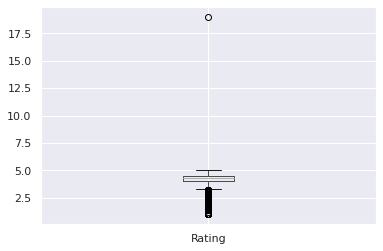

In [208]:
ddf.boxplot() # Since rating can range from 1 to 5 we can observe the presence of an outlier. 

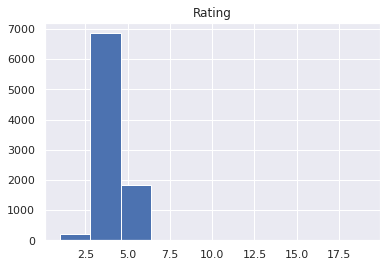

In [209]:
ddf.hist();

In [210]:
ddf[ddf.Rating>5] # We observe the data frame [9989] has shifted values. ['NaN' , 1.9 , 19.0 , '3.0M', '1,000+','Free', 0, 'Everyone'	, 'NaN', 'February 11, 2018' , '1.0.19' , 4.0  ]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9989,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [211]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [212]:
ddf.drop([9989],inplace=True) # dropping the row to maintain logical consistency

In [213]:
ddf.reset_index(drop=True, inplace=True) # resetting index after dropping column 

In [214]:
ddf.iloc[9987:9995]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9987,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
9988,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9989,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
9990,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
9991,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
9992,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
9993,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4.0,4.0 and up
9994,Sci Fi Sounds,FAMILY,3.2,4,8.0M,"1,000+",Free,0,Everyone,Entertainment,"November 2, 2017",1.0,4.0 and up


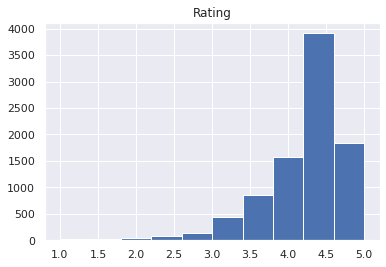

In [215]:
ddf.hist(); # After treating the outlier we observe the rating values range from 1 to 5 

In [216]:
ddf['Rating'].isnull().sum() # we observe there are 1465 null values in ratings column 

1465

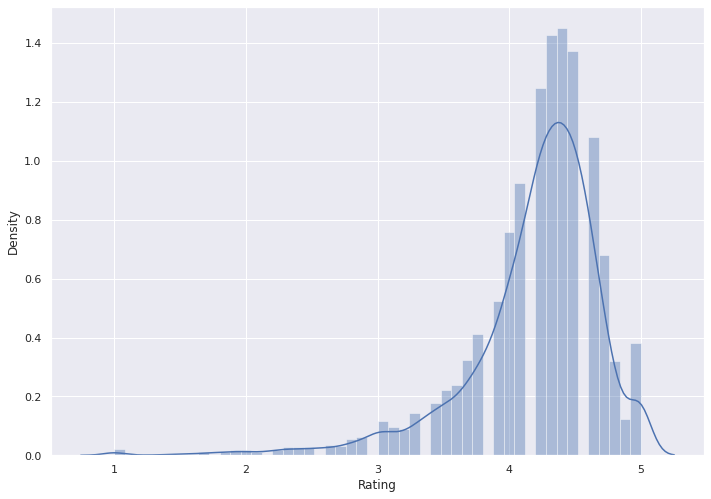

In [217]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot Before we fill nan values 
ax = sns.distplot(ddf['Rating'])

In [218]:
impute_median=ddf['Rating'].median()                     # You may note that the data is skewed it is not recommended to use the mean for replacing the missing values
ddf['Rating']=ddf['Rating'].fillna(impute_median)      # Using mean values for replacing missing values may not create a great model and hence gets ruled out.

As the distribution is skewed we will impute through mode 
When the data is skewed, it is good to consider using the mode value for replacing the missing values

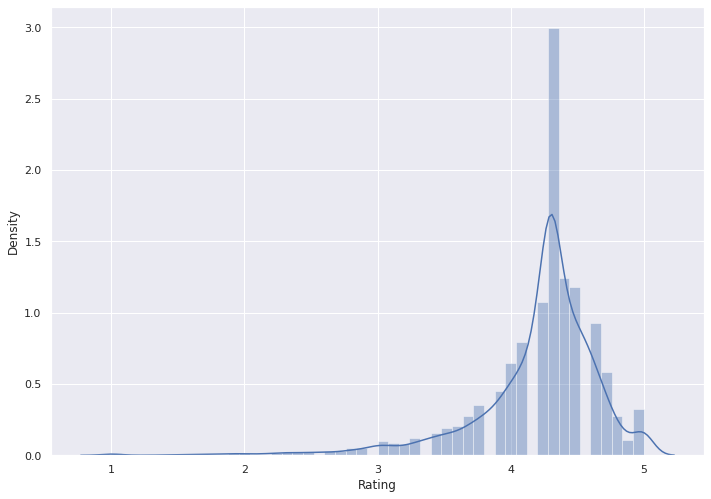

In [219]:
sns.set(rc={'figure.figsize':(11.7,8.25)}) #Plot after we fill NaN values, we can observe little to no devation from the original plot. 
ax = sns.distplot(ddf['Rating'])

### **Install & Price**

In [220]:
ddf[('Installs')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [221]:
ddf[('Price')].unique() # we observe that there are unwanted characters in the dataset and the data type of the data is of object type. 

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$1.00', '$2.49',
       '$10.99', '$1.50', '$14.99', '$15.99', '$79.99', '$9.00', '$24.99',
       '$10.00', '$16.99', '$11.99', '$29.99', '$74.99', '$5.49',
       '$33.99', '$12.99', '$39.99', '$19.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [222]:
chars_to_remove = ['+', ',' , '$' ]
# List of column names to clean
cols_to_clean = ['Installs', 'Price']

# Loop for each column
for col in cols_to_clean:
    # Replace each character with an empty string
    for char in chars_to_remove:
        ddf[col] = ddf[col].astype(str).str.replace(char, '')
   

Price

In [223]:
 # Convert col to numeric
ddf['Price'] = pd.to_numeric(ddf['Price']) 

In [224]:
ddf[('Price')].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   1.  ,   2.49,  10.99,
         1.5 ,  14.99,  15.99,  79.99,   9.  ,  24.99,  10.  ,  16.99,
        11.99,  29.99,  74.99,   5.49,  33.99,  12.99,  39.99,  19.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [225]:
ddf['Price'].isnull().sum()# checking for null values 

0

In [226]:
ddf[('Price')].describe() # We can observe that the data type is changed to float type 

count    10357.000000
mean         1.030800
std         16.278625
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        400.000000
Name: Price, dtype: float64

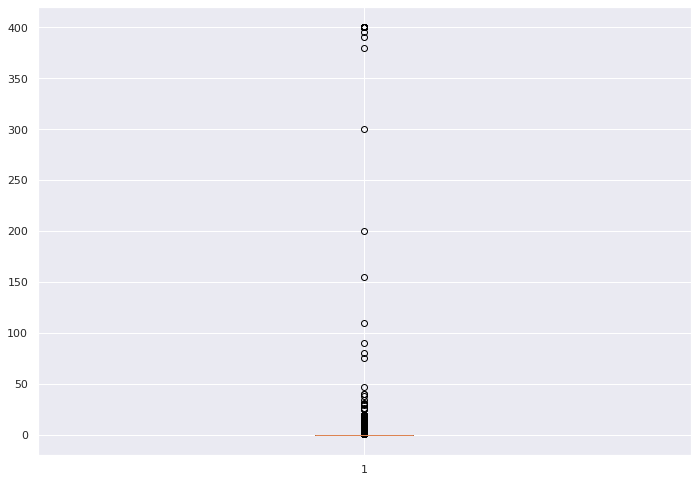

In [227]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [228]:
ddf.shape

(10357, 13)

In [229]:
print(ddf[ddf.Price>100].shape)  # We observe that there are 20 apps which are outliers for price app 
Expen= ddf[ddf.Price>100]
Expen

(20, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3714,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
3879,💎 I'm rich,LIFESTYLE,3.8,718,26M,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
3884,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
4868,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
4871,I am Rich Plus,FAMILY,4.0,856,8.7M,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
4872,I am rich VIP,LIFESTYLE,3.8,411,2.6M,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
4873,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
4874,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
4875,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4876,I am rich(premium),FINANCE,3.5,472,965k,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [230]:
ddf=ddf[ddf.Price<=100]

In [231]:
ddf.shape #Shape of the Dataset changes from (10357, 13)

(10337, 13)

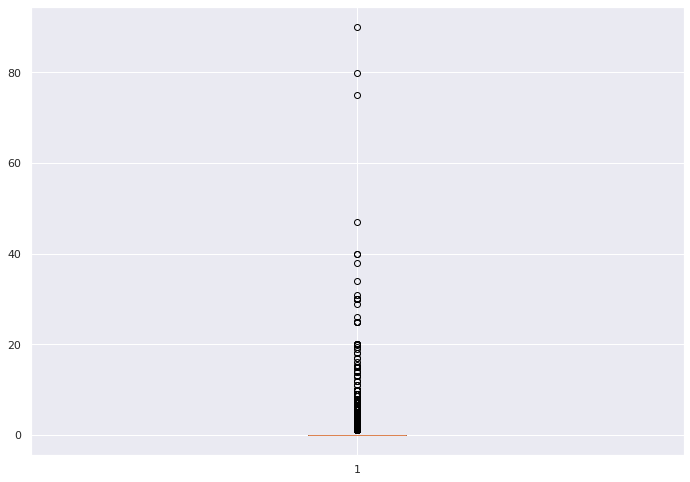

In [232]:
#Create a box plot for the price column
plt.boxplot(ddf.Price)
plt.show()

In [233]:
ddf[ddf.Price != 0].sort_values(by=['Price'], ascending=True)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9556,Device Info Ex Live Wallpaper,PERSONALIZATION,4.1,2645,1.1M,50000,Paid,0.99,Everyone,Personalization,"December 20, 2015",11.0.0,2.1 and up
5321,INTERACTIVE CALCULUS PRO,FAMILY,4.3,0,3.3M,10,Paid,0.99,Everyone,Education,"February 22, 2018",1.2,4.0.3 and up
5294,F05WatchFace for Android Wear,PRODUCTIVITY,3.9,127,5.9M,1000,Paid,0.99,Everyone,Productivity,"December 24, 2017",7.0.1,4.3 and up
9552,Deus Ex GO,FAMILY,4.5,9699,23M,100000,Paid,0.99,Teen,Puzzle,"July 23, 2018",2.1.111374,4.2 and up
9522,European War 6: 1804,FAMILY,4.2,1330,96M,10000,Paid,0.99,Teen,Strategy,"July 18, 2018",1.1.0,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3651,Norwegian For Kids & Babies F,FAMILY,4.3,0,14M,5,Paid,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up
6076,Dr.Dice - Sic bo analyzer,FAMILY,4.3,2,8.5M,10,Paid,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up
2081,Language Therapy: Aphasia,MEDICAL,4.3,10,28M,1000,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
2056,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up


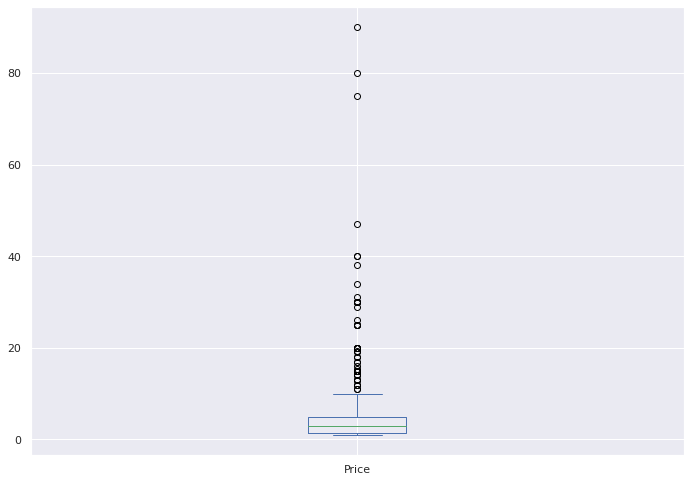

In [234]:
ddf[ddf.Price>0].Price.plot.box() # Box plot of Paid apps
plt.show()


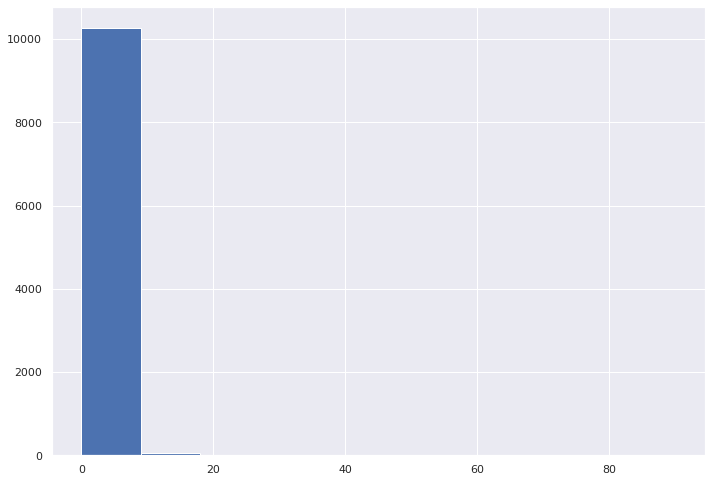

In [235]:
plt.hist(ddf.Price)
plt.show()

In [236]:
ddf[ddf.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2056,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32M,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2081,Language Therapy: Aphasia,MEDICAL,4.3,10,28M,1000,Paid,74.99,Everyone,Medical,"June 25, 2018",3.1.1,4.0.3 and up
2093,A Manual of Acupuncture,MEDICAL,3.5,214,68M,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2104,LTC AS Legal,MEDICAL,4.0,6,1.3M,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
3651,Norwegian For Kids & Babies F,FAMILY,4.3,0,14M,5,Paid,39.99,Everyone,Education,"September 24, 2015",1.0,4.0 and up
4877,I am Rich Person,LIFESTYLE,4.2,134,1.8M,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up
6076,Dr.Dice - Sic bo analyzer,FAMILY,4.3,2,8.5M,10,Paid,46.99,Everyone,Entertainment,"November 5, 2016",1.0,4.0.3 and up
9247,Lean EQ,BUSINESS,4.3,6,10M,10,Paid,89.99,Everyone,Business,"February 14, 2017",1.0,4.1 and up
9422,Eu sou Rico,FINANCE,4.3,0,2.6M,0,Paid,30.99,Everyone,Finance,"January 9, 2018",1.0,4.0 and up


In [237]:
print(ddf[ddf.Price > 30].shape)
ddf.shape

(9, 13)


(10337, 13)

In [238]:
ddf=ddf[ddf.Price<30]

In [239]:
ddf.shape ## Shape of the Dataset changes from (10357, 13)

(10328, 13)

In [240]:
ddf[(ddf.Type == "Free") & (ddf.Price > 0)] # Checking data for logical inconsistency, there are none present 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Installs

In [241]:
ddf.sort_values(by='Installs')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8388,Test Application DT 02,ART_AND_DESIGN,4.3,0,1.2M,0,Free,0.00,Everyone,Art & Design,"March 14, 2017",4.0,4.2 and up
5003,AP Series Solution Pro,FAMILY,4.3,0,7.4M,0,Paid,1.99,Everyone,Education,"July 30, 2017",1.3,4.0 and up
8131,Sweden Newspapers,NEWS_AND_MAGAZINES,4.3,0,2.1M,0,Free,0.00,Everyone,News & Magazines,"July 7, 2018",1.1,4.4 and up
6951,Pekalongan CJ,SOCIAL,4.3,0,5.9M,0,Free,0.00,Teen,Social,"July 21, 2018",0.0.1,4.4 and up
4824,Ak Parti Yardım Toplama,SOCIAL,4.3,0,8.7M,0,Paid,13.99,Teen,Social,"July 28, 2017",3.4.4.3.3,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2822,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,500000000,Free,0.00,Everyone,Tools,"July 31, 2018",Varies with device,Varies with device
377,Viber Messenger,COMMUNICATION,4.3,11334973,Varies with device,500000000,Free,0.00,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
3739,imo free video calls and chat,COMMUNICATION,4.3,4785892,11M,500000000,Free,0.00,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
4083,SHAREit - Transfer & Share,TOOLS,4.6,7775146,17M,500000000,Free,0.00,Everyone,Tools,"July 30, 2018",4.5.28_ww,4.1 and up


In [242]:
 # Convert col to numeric
 ddf['Installs'] = pd.to_numeric(ddf['Installs']) 

In [243]:
ddf[('Installs')].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
       1000000000,       1000,  500000000,         50,        100,
              500,         10,          1,          5,          0])

In [244]:
ddf[('Installs')].describe() # We can observe that the data type is changed to float type 

count    1.032800e+04
mean     1.419749e+07
std      8.034863e+07
min      0.000000e+00
25%      1.000000e+03
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [245]:
ddf['Installs'].isnull().sum() # checking for null values


0

In [246]:
ddf.shape

(10328, 13)

In [247]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10328 non-null  object 
 1   Category        10328 non-null  object 
 2   Rating          10328 non-null  float64
 3   Reviews         10328 non-null  object 
 4   Size            10328 non-null  object 
 5   Installs        10328 non-null  int64  
 6   Type            10327 non-null  object 
 7   Price           10328 non-null  float64
 8   Content Rating  10328 non-null  object 
 9   Genres          10328 non-null  object 
 10  Last Updated    10328 non-null  object 
 11  Current Ver     10320 non-null  object 
 12  Android Ver     10326 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.1+ MB


### **Reviews**

In [248]:
ddf['Reviews'].describe() # we observe that reviews data type is object, for convinience during EDA we will convert it to int data type. 

count     10328
unique     5998
top           0
freq        586
Name: Reviews, dtype: object

In [249]:
ddf = ddf.astype({'Reviews':'int'})

In [250]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10328 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10328 non-null  object 
 1   Category        10328 non-null  object 
 2   Rating          10328 non-null  float64
 3   Reviews         10328 non-null  int64  
 4   Size            10328 non-null  object 
 5   Installs        10328 non-null  int64  
 6   Type            10327 non-null  object 
 7   Price           10328 non-null  float64
 8   Content Rating  10328 non-null  object 
 9   Genres          10328 non-null  object 
 10  Last Updated    10328 non-null  object 
 11  Current Ver     10320 non-null  object 
 12  Android Ver     10326 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [251]:
ddf['Reviews'].describe()

count    1.032800e+04
mean     4.070434e+05
std      2.700476e+06
min      0.000000e+00
25%      3.300000e+01
50%      1.716500e+03
75%      4.694475e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [252]:
ddf['Reviews'].isnull().sum() # there are no null values in Reviews 

0

In [253]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [254]:
print(ddf[(ddf.Reviews > ddf.Installs)].shape);     # We observe logical inconsistency in our data as the number reviews cannot be greater than number of installs. 
print('\n')
print(ddf.shape);
print('\n')
ddf[(ddf.Reviews > ddf.Installs)]



(11, 13)


(10328, 13)




,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2138,KBA-EZ Health Guide,MEDICAL,5.0,4,25M,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4067,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.3,4,64M,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4180,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,Varies with device,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5329,AX Watch for WatchMaker,PERSONALIZATION,4.3,2,238k,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5434,Ra Ga Ba,GAME,5.0,2,20M,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6025,Sam.BN Pro,TOOLS,4.3,11,2.0M,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6217,Brick Breaker BR,GAME,5.0,7,19M,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
6919,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8108,DN Blog,SOCIAL,5.0,20,4.2M,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
8613,DZ Puzzle,FAMILY,4.3,14,47M,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [255]:
ddf = ddf[ddf.Reviews <= ddf.Installs]         #observation with logical inconsistency have been removed. 
print(ddf.shape) 
ddf

(10317, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10352,Sya9a Maroc - FR,FAMILY,4.5,38,53M,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10353,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10354,Parkinson Exercices FR,MEDICAL,4.3,3,9.5M,1000,Free,0.0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


### **Current Var**

In [256]:
ddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [257]:
ddf[ddf['Current Ver'].isnull()]  # checking for null values, we observe 7 null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,5000,Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1344,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,1000000,Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5839,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,500000,Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6320,BT Master,FAMILY,4.3,0,222k,100,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6850,Dots puzzle,FAMILY,4.0,179,14M,50000,Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6924,Calculate My IQ,FAMILY,4.3,44,7.2M,10000,Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7247,UFO-CQ,TOOLS,4.3,1,237k,10,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9859,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,1000,Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [258]:
#Check the most common value in the Android version column
ddf["Current Ver"].value_counts() 

Varies with device    1301
1.0                    787
1.1                    260
1.2                    176
2.0                    148
                      ... 
9.2.0                    1
9.14.1                   1
1.7.2992                 1
0.4.4                    1
2.0.148.0                1
Name: Current Ver, Length: 2827, dtype: int64

In [259]:
ddf['Current Ver'].value_counts()

Varies with device    1301
1.0                    787
1.1                    260
1.2                    176
2.0                    148
                      ... 
9.2.0                    1
9.14.1                   1
1.7.2992                 1
0.4.4                    1
2.0.148.0                1
Name: Current Ver, Length: 2827, dtype: int64

In [260]:
ddf['Size'].value_counts()

Varies with device    1525
11M                    188
12M                    186
13M                    186
14M                    181
                      ... 
200k                     1
460k                     1
728k                     1
496k                     1
619k                     1
Name: Size, Length: 459, dtype: int64

In [261]:
ddf[ddf['Current Ver']=='Varies with device']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,5000000,Free,0.0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,10000000,Free,0.0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,1000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,5000000,Free,0.0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10241,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,1000,Free,0.0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10281,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,100000,Free,0.0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10342,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,5000000,Free,0.0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device
10355,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [262]:
ddf["Current Ver"].mode()  #Current Ver

0    Varies with device
dtype: object

In [263]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10317 non-null  object 
 1   Category        10317 non-null  object 
 2   Rating          10317 non-null  float64
 3   Reviews         10317 non-null  int64  
 4   Size            10317 non-null  object 
 5   Installs        10317 non-null  int64  
 6   Type            10316 non-null  object 
 7   Price           10317 non-null  float64
 8   Content Rating  10317 non-null  object 
 9   Genres          10317 non-null  object 
 10  Last Updated    10317 non-null  object 
 11  Current Ver     10309 non-null  object 
 12  Android Ver     10315 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [264]:
ddf["Current Ver"] = ddf["Current Ver"].fillna(ddf["Current Ver"].mode()[0])

In [265]:
ddf["Current Ver"].value_counts() 

Varies with device    1309
1.0                    787
1.1                    260
1.2                    176
2.0                    148
                      ... 
9.2.0                    1
9.14.1                   1
1.7.2992                 1
0.4.4                    1
2.0.148.0                1
Name: Current Ver, Length: 2827, dtype: int64

In [266]:
ddf['Current Ver'].isnull().sum()

0

### **Android Var**

In [267]:
ddf[ddf["Android Ver"].isnull()]  # checking for null values 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3970,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4007,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,10000,Free,0.00,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [268]:
#Check the most common value in the Android version column
ddf["Android Ver"].value_counts() 

4.1 and up            2370
4.0.3 and up          1442
4.0 and up            1331
Varies with device    1220
4.4 and up             890
2.3 and up             638
5.0 and up             546
4.2 and up             385
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             234
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              41
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [269]:
ddf["Android Ver"].mode()

0    4.1 and up
dtype: object

In [270]:
#Fill up the nulls in the Android Version column with the above value
ddf["Android Ver"] = ddf["Android Ver"].fillna(ddf["Android Ver"].mode()[0])

In [271]:
#Check the nulls in the Android version column again to cross-verify
print(ddf[ddf["Android Ver"].isnull()])
print ('\n')

ddf["Android Ver"].value_counts() 

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []




4.1 and up            2372
4.0.3 and up          1442
4.0 and up            1331
Varies with device    1220
4.4 and up             890
2.3 and up             638
5.0 and up             546
4.2 and up             385
2.3.3 and up           279
2.2 and up             239
3.0 and up             236
4.3 and up             234
2.1 and up             133
1.6 and up             115
6.0 and up              58
7.0 and up              41
3.2 and up              36
2.0 and up              32
5.1 and up              22
1.5 and up              20
4.4W and up             11
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [272]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10317 non-null  object 
 1   Category        10317 non-null  object 
 2   Rating          10317 non-null  float64
 3   Reviews         10317 non-null  int64  
 4   Size            10317 non-null  object 
 5   Installs        10317 non-null  int64  
 6   Type            10316 non-null  object 
 7   Price           10317 non-null  float64
 8   Content Rating  10317 non-null  object 
 9   Genres          10317 non-null  object 
 10  Last Updated    10317 non-null  object 
 11  Current Ver     10317 non-null  object 
 12  Android Ver     10317 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


In [273]:
ddf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### type

In [274]:
ddf["Size"] = ddf["Size"].fillna(ddf["Size"].mode()[0])

In [275]:
ddf.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### **Size**

In [276]:
ddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10317 entries, 0 to 10356
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10317 non-null  object 
 1   Category        10317 non-null  object 
 2   Rating          10317 non-null  float64
 3   Reviews         10317 non-null  int64  
 4   Size            10317 non-null  object 
 5   Installs        10317 non-null  int64  
 6   Type            10316 non-null  object 
 7   Price           10317 non-null  float64
 8   Content Rating  10317 non-null  object 
 9   Genres          10317 non-null  object 
 10  Last Updated    10317 non-null  object 
 11  Current Ver     10317 non-null  object 
 12  Android Ver     10317 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.1+ MB


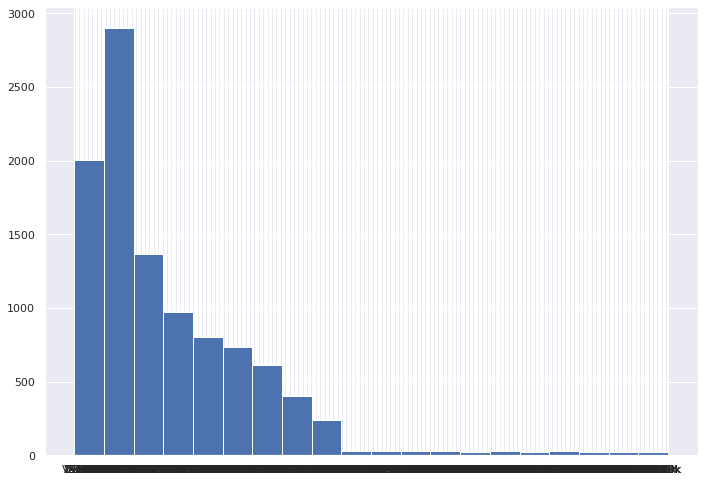

In [277]:
#Plot a histogram for Size as well.
plt.hist(ddf.Size, bins=20)
plt.show()

# Questions To Solve
1.   What is the most expensive app on the store.
2.   Which Genre has more apps.
3.   What is the average size of the free apps & paid apps
4.   What is the 5 top rated apps.
5.   How many apps that has more than 50K reviews.
6.   What is the average price of the apps for each genre with each installs numbers. 
7.   How many apps have rating > 4.7 and what is thier avg price.
8.   How much google earned from the 5,000,000+ installed apps
9.   What is the max and min size for free and paid apps.
10.  is there a correlation between rating, Reviews, Size with the price of the app
11.  How many apps for each type for each content reading
12.  How many apps that can work on android version 4.2
13.  What is the highest Category of apps 
14.  

 

1.   What is the most expensive app on the store ?

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3884,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
3714,most expensive app (H),FAMILY,4.3,6,1.5M,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4875,I am Rich!,FINANCE,3.8,93,22M,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
4890,I AM RICH PRO PLUS,FINANCE,4.0,36,41M,1000,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
4886,I am Rich,FINANCE,4.3,180,3.8M,5000,Paid,399.99,Everyone,Finance,"March 22, 2018",1.0,4.2 and up


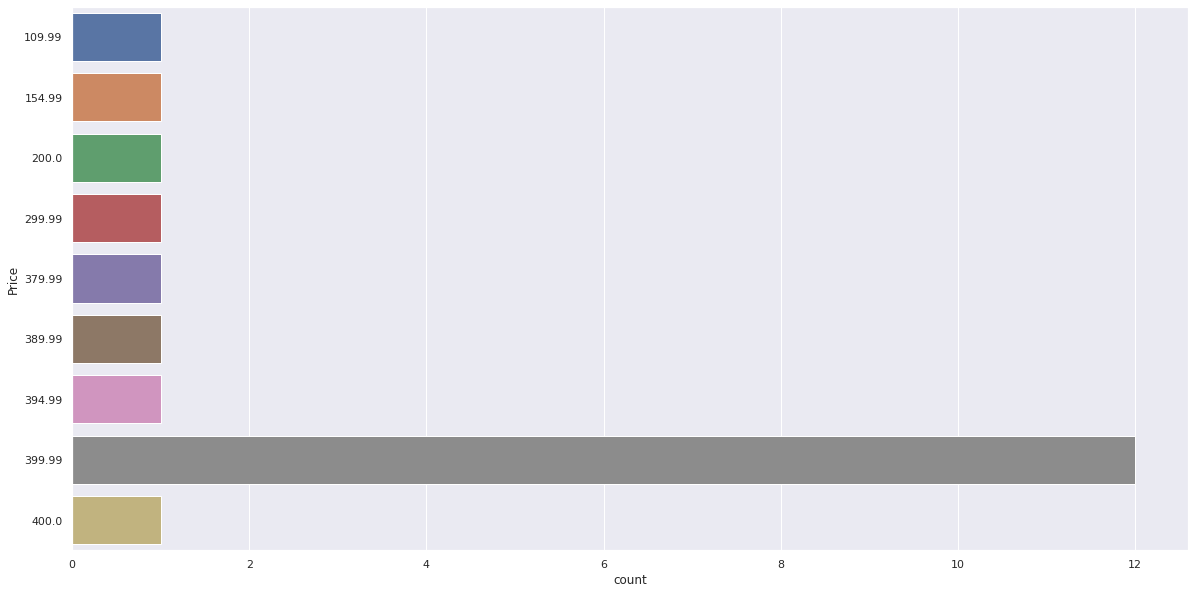

In [278]:
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Price', data=Expen)
Expen.sort_values(by='Price',ascending=False).head()    #I'm Rich - Trump Edition	 is the most expensive application with 5000 installs 


2.   Which Genre has more apps.

In [279]:
dfg=ddf.sort_values(by='Genres').head()
lables= 'Tools','Entertainment','Education' ,'Medical' ,'Business'

3.   What is the average size of the free apps & paid apps

4.   What is the 5 top rated apps.

5.   How many apps that has more than 50K reviews.

13.   What is the highest Category of apps ?

In [286]:
dfc=df[ 'Category'].value_counts().head()


NameError: ignored

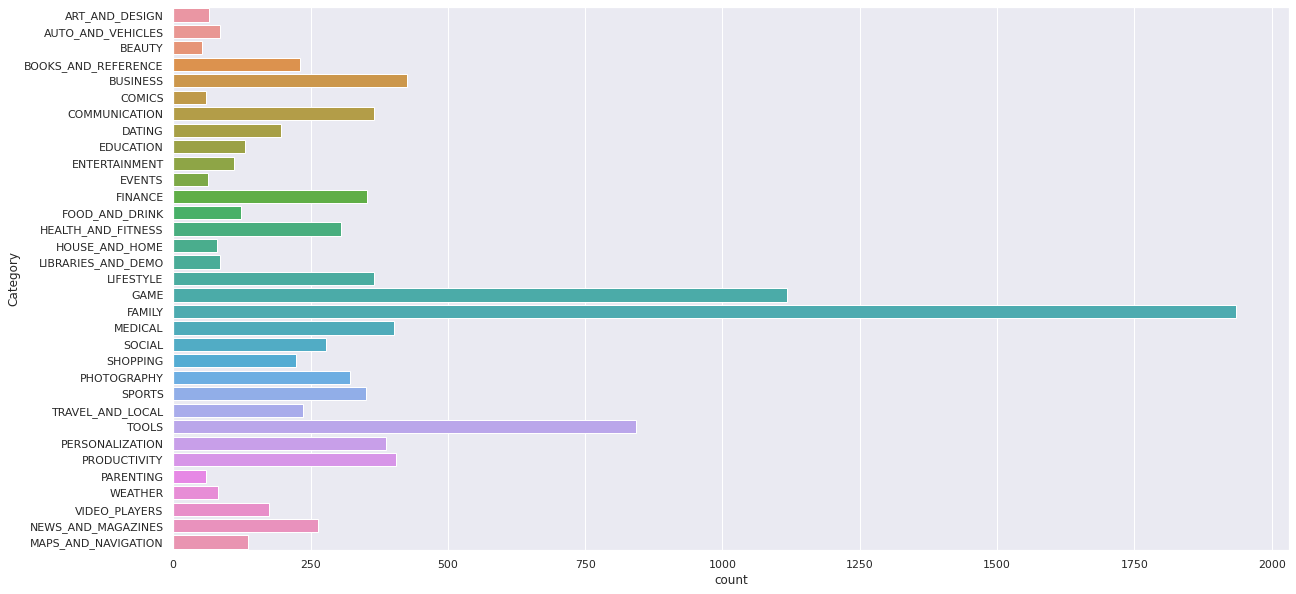

In [284]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
ax = sns.countplot(y='Category', data=ddf)

print(dfc);                                                                                   # We observe that apps with the Genre of family has the maximum apps witvh vaLue 1972

## free app vs paid app

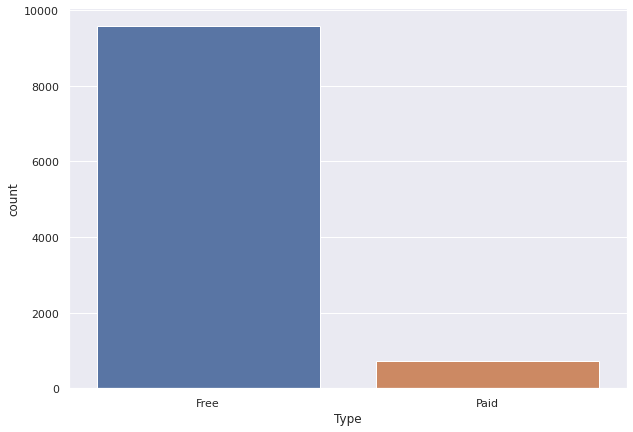

In [288]:
plt.figure(figsize=(10,7))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Type', data=ddf)

In [289]:
ddf.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [290]:
ddf.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##highest installed app

In [287]:
installed_app = ddf[ddf['Installs']== 1000000000 ]
installed_app[['App','Installs']].head(10)

,App,Installs
152,Google Play Books,1000000000
302,Google Chrome: Fast & Secure,1000000000
304,Hangouts,1000000000
337,WhatsApp Messenger,1000000000
338,Messenger – Text and Video Chat for Free,1000000000
340,Hangouts,1000000000
357,Google Chrome: Fast & Secure,1000000000
397,Gmail,1000000000
410,Hangouts,1000000000
744,Google Play Games,1000000000


## app with zero installment 

In [281]:
installed_app = ddf[ddf['Installs']==0]
installed_app[['App','Installs','Price']]

,App,Installs,Price
3982,Popsicle Launcher for Android P 9.0 launcher,0,1.49
4824,Ak Parti Yardım Toplama,0,13.99
5003,AP Series Solution Pro,0,1.99
5462,Ain Arabic Kids Alif Ba ta,0,2.99
6951,Pekalongan CJ,0,0.00
7598,CX Network,0,0.00
8131,Sweden Newspapers,0,0.00
8388,Test Application DT 02,0,0.00
8665,Command & Conquer: Rivals,0,0.00
8854,EG | Explore Folegandros,0,3.99


In [282]:
installed_app2 = ddf[ddf['Price']==399]
installed_app[['App','Price']]

,App,Price
3982,Popsicle Launcher for Android P 9.0 launcher,1.49
4824,Ak Parti Yardım Toplama,13.99
5003,AP Series Solution Pro,1.99
5462,Ain Arabic Kids Alif Ba ta,2.99
6951,Pekalongan CJ,0.00
7598,CX Network,0.00
8131,Sweden Newspapers,0.00
8388,Test Application DT 02,0.00
8665,Command & Conquer: Rivals,0.00
8854,EG | Explore Folegandros,3.99


In [283]:
ddf['Price'].sort_values(ascending=True).tail(20)

6354    17.99
4878    18.99
6864    19.40
5256    19.90
4553    19.99
6994    19.99
2110    19.99
4365    19.99
8236    19.99
2098    24.99
2109    24.99
9091    24.99
2063    24.99
3694    25.99
8621    28.99
7845    29.99
5006    29.99
2097    29.99
2634    29.99
2078    29.99
Name: Price, dtype: float64

In [ ]:
ddf['Price'].describe()

In [ ]:
ddf['Installs'].max()

In [ ]:
ddf['Installs'].min()

In [ ]:
ddf['Installs'].mean()